In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats as sci

In [2]:
csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/cross_conditions/Q-Var/q10var100/12.csv'
data = pd.read_csv(csv_filename)

In [3]:
data.shape[1]

12

In [4]:
Xpose = data['Xposition'].to_list()
Ypose = data['Yposition'].to_list()

aV_arousal = data['aVarousal'].to_list()
dV_arousal = data['dVarousal'].to_list()

aV_security = data['aVsecurity'].to_list()
dV_security = data['dVsecurity'].to_list()

aroIntensity = data['aroIntensity'].to_list()
secIntensity = data['secIntensity'].to_list()

force_arousal = data['TFarousal'].to_list()
force_security = data['TFsecurity'].to_list()

In [5]:
aV_security

[0.9996,
 0.9992,
 0.9988,
 0.9984000000000002,
 0.9980000000000002,
 0.9976000000000004,
 0.9972000000000004,
 0.9968000000000004,
 0.9964000000000004,
 0.9960000000000004,
 0.9956000000000004,
 0.9952000000000004,
 0.9948000000000006,
 0.9944000000000006,
 0.9940000000000008,
 0.9936000000000008,
 0.9932000000000007,
 0.9928000000000008,
 0.9924000000000008,
 0.9920000000000008,
 0.9916000000000008,
 0.9912000000000011,
 0.990800000000001,
 0.9904000000000012,
 0.9900000000000012,
 0.9896000000000011,
 0.9892000000000012,
 0.9888000000000012,
 0.9884000000000012,
 0.9880000000000012,
 0.9876000000000014,
 0.9872000000000014,
 0.9868000000000016,
 0.9864000000000016,
 0.9860000000000017,
 0.9856000000000016,
 0.9852000000000016,
 0.9848000000000016,
 0.9844000000000016,
 0.9840000000000018,
 0.9836000000000018,
 0.983200000000002,
 0.982800000000002,
 0.982400000000002,
 0.9820000000000021,
 0.9816000000000021,
 0.981200000000002,
 0.980800000000002,
 0.9804000000000022,
 0.9800000000

In [6]:
secIntensity

[0.000399999999999956,
 0.0007999999999999119,
 0.0011999999999998678,
 0.0015999999999998238,
 0.00199999999999978,
 0.002399999999999736,
 0.002799999999999692,
 0.003199999999999648,
 0.003599999999999603,
 0.00399999999999956,
 0.0043999999999995145,
 0.004799999999999471,
 0.005199999999999427,
 0.005599999999999382,
 0.005999999999999339,
 0.006399999999999295,
 0.006799999999999251,
 0.007199999999999206,
 0.007599999999999162,
 0.007999999999999119,
 0.008399999999999075,
 0.008799999999999029,
 0.009199999999998987,
 0.009599999999998944,
 0.0099999999999989,
 0.010399999999998856,
 0.010799999999998809,
 0.011199999999998765,
 0.011599999999998722,
 0.011999999999998678,
 0.012399999999998634,
 0.01279999999999859,
 0.013199999999998544,
 0.013599999999998502,
 0.013999999999998458,
 0.014399999999998412,
 0.014799999999998368,
 0.015199999999998324,
 0.015599999999998282,
 0.015999999999998238,
 0.016399999999998194,
 0.01679999999999815,
 0.017199999999998106,
 0.0175999999

In [7]:
len(aroIntensity)

35000

In [8]:
mean_force_arousal = 0
for i in range(len(force_arousal)):
    mean_force_arousal += force_arousal[i]
    
mean_force_arousal /= len(force_arousal)
print(mean_force_arousal)

if mean_force_arousal < 0:
    print('Absolute convertion of TF arousal')
    neg_force_arousal = force_arousal
    force_arousal = []
    for i in range(len(neg_force_arousal)):
        force_arousal.append(abs(neg_force_arousal[i]))

0.12728851868086627


In [9]:
Xpose = data['Xposition'].to_list()
Ypose = data['Yposition'].to_list()

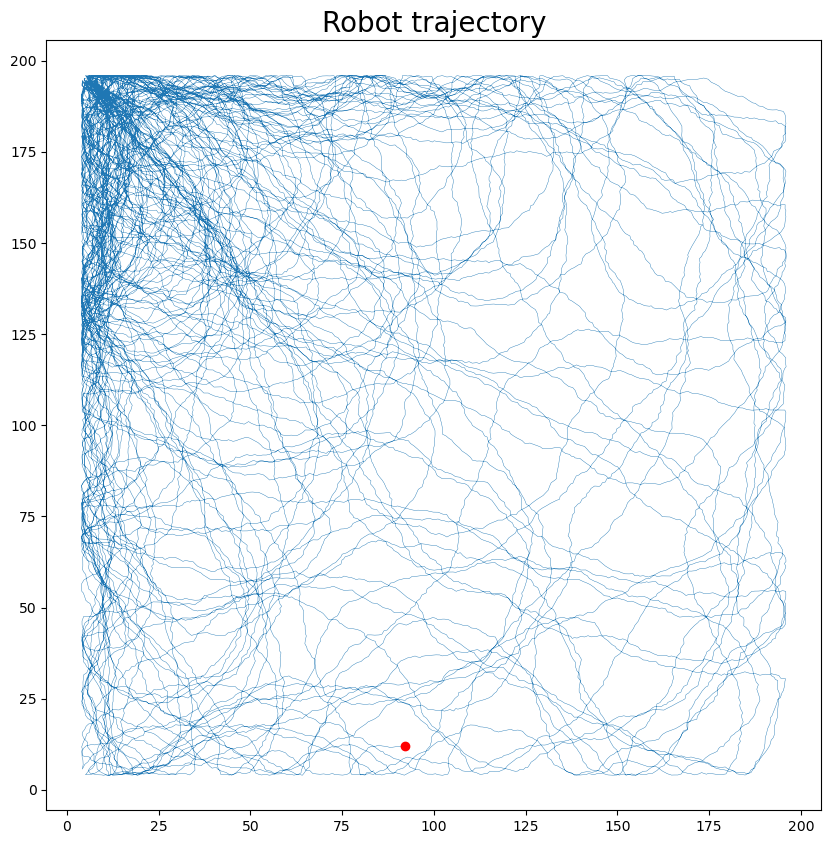

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(Xpose, Ypose, linewidth=0.3)
plt.yticks(np.arange(0, 210, step=25))
plt.xticks(np.arange(0, 210, step=25))
plt.title('Robot trajectory', fontsize=20)
plt.plot(Xpose[0],Ypose[0],'ro')
plt.show()

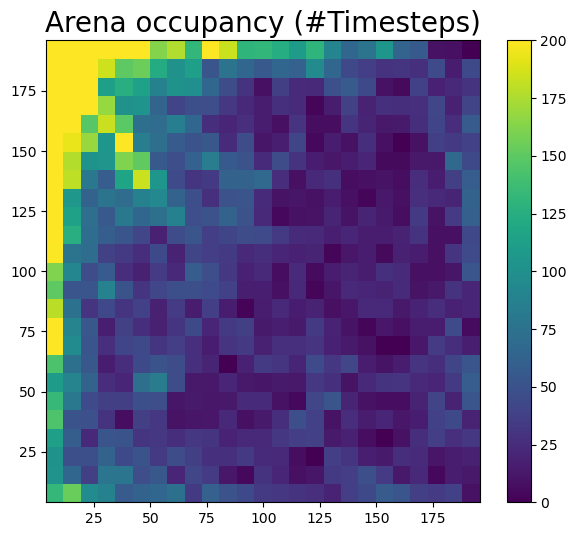

In [11]:
plt.figure(figsize=(7, 6))
plt.hist2d(Xpose,Ypose, bins=25, density=False, vmax=200) #, vmax=200  , vmax=0.00010

plt.colorbar()
plt.title('Arena occupancy (#Timesteps)', fontsize=20)

plt.show()

[  0.          48.99757111  97.99514222 146.99271333 195.99028444]


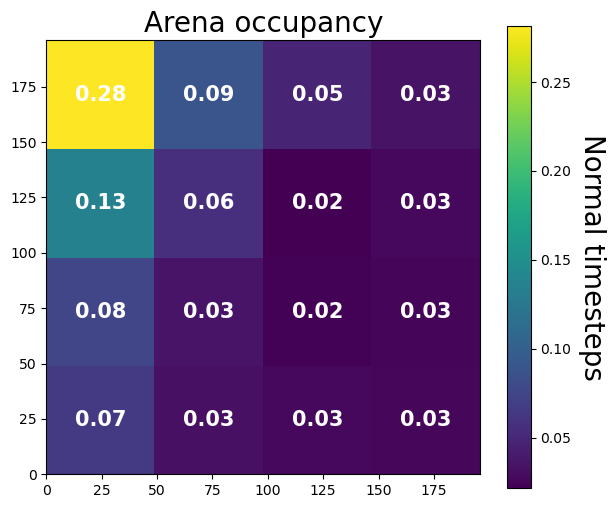

In [12]:
xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 4
xedges= []
yedges= []

for i in range(bins):
    xedges.append((max(Xpose)/bins)*i)
    yedges.append((max(Ypose)/bins)*i)
    
xedges.append((max(Xpose)))
yedges.append((max(Ypose)))


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])

print(xbins)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+xedges[1]/2, ybins[i]+yedges[1]/2, round(H_normalized[i,j],2), fontsize=15, ha="center", va="center", color="w", fontweight="bold")
        
        
ax.set_title('Arena occupancy', fontsize=20)
ax.set_yticks(np.arange(0, 200, step=25))
ax.set_xticks(np.arange(0, 200, step=25))
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=20, labelpad=+25)

plt.show()

# Entropy

In [13]:
prob = H_normalized

uniform_distr = np.ones((prob.shape[0], prob.shape[1]))
uniform_distr /= uniform_distr.sum()
max_entropy = -np.sum( uniform_distr * np.log2(uniform_distr) )

prob = prob.flatten() 

entropy = -np.sum(prob*np.log2(prob))

normal_entropy = entropy/max_entropy
print(normal_entropy)

0.871233048208556


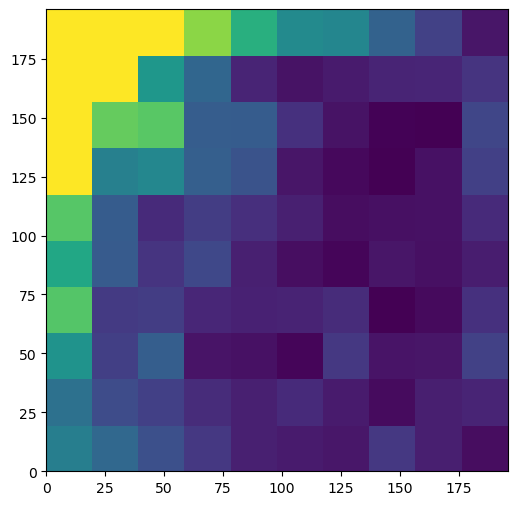

In [14]:
xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 10
xedges= []
yedges= []

for i in range(bins):
    xedges.append((max(Xpose)/bins)*i)
    yedges.append((max(Ypose)/bins)*i)
    
xedges.append((max(Xpose)))
yedges.append((max(Ypose)))

fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=1000)
H = hist.T
H_normalized = H/float(xy_array.shape[0])

hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


plt.show()

In [15]:
prob = H_normalized
uniform_distr = np.ones((prob.shape[0], prob.shape[1]))
uniform_distr /= uniform_distr.sum()
uniform_distr

array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]])

In [16]:
prob = prob.flatten()
entropy = -np.sum(prob*np.log2(prob))
entropy

5.985608681671076

In [17]:
normal_entropy = entropy/max_entropy
print(normal_entropy)

1.496402170417769


In [18]:
prob = H_normalized

uniform_distr = np.ones((prob.shape[0], prob.shape[1]))
uniform_distr /= uniform_distr.sum()
max_entropy = -np.sum( uniform_distr * np.log2(uniform_distr) )

prob = prob.flatten() 

entropy = -np.sum(prob*np.log2(prob))

normal_entropy = entropy/max_entropy
print(normal_entropy)

0.9009238777448662


# Mutual information

In [19]:
def mutual_info(distr):
    pS = np.sum(distr, axis=1)
    pR = np.sum(distr, axis=0)
    pSR = np.copy(distr)
    np.seterr(divide='ignore', invalid='ignore')
    I = np.sum(pSR * np.ma.log2(pSR / (pR[np.newaxis, :] * pS[:, np.newaxis])).filled(0))
    return I

In [20]:
pos_bins = 9
u_bins = 5

max_distr = np.zeros((pos_bins,u_bins))
max_distr[0,0] = 1
max_distr[1,1] = 1
max_distr[2,2] = 1
max_distr[3,3] = 1
max_distr[4,4] = 1

max_distr /= max_distr.sum()

print("Max mutual information = " + str(mutual_info(max_distr)))

Max mutual information = 2.321928094887362


In [21]:
# Bined U_security
# 5 states: (1)0-.2, (2).2-.4, (3).4-.6, (4).6-.8, (5).8-1

# for U_security[i] look to its bined position

# 9 bined position:
#(X)0-max/3 and (Y)0-max/3,         (X)0-max/3 and (Y)max/3-max/3*2,         (X)0-max/3 and (Y)max/3*2-max/3*3,
#(X)max/3-max/3*2 and (Y)0-max/3,   (X)max/3-max/3*2 and (Y)max/3-max/3*2,   (X)max/3-max/3*2 and (Y)max/3*2-max/3*3,
#(X)max/3*2-max/3*3 and (Y)0-max/3, (X)max/3*2-max/3*3 and (Y)max/3-max/3*2, (X)max/3*2-max/3*3 and (Y)max/3*2-max/3*3

#++1 in distr[aV_security, bined_position]

In [22]:
bined_u_sec = []

bin_size = .2
count = 0
for i in range(len(secIntensity)):
    for j in range(u_bins):
        if secIntensity[i] >= bin_size * j and secIntensity[i] <= bin_size * (j+1):
            bined_u_sec.append(j)
            count += 1
            
print(len(bined_u_sec))

35000


In [23]:
bined_u_aro = []
u_bins = 5
bin_size = .2
count = 0
for i in range(len(aroIntensity)):
    for j in range(u_bins):
        if aroIntensity[i] >= bin_size * j and aroIntensity[i] <= bin_size * (j+1):
            bined_u_aro.append(j)
            count += 1
            
print(len(bined_u_aro))

35000


In [24]:
bined_pos = []
binxbin = 3

for a in range(len(Xpose)):
    for i in range(binxbin):
        if Xpose[a] >= (200/binxbin)*(i) and Xpose[a] < (200/binxbin)*(i+1):
            for j in range(binxbin):
                if Ypose[a] >= (200/binxbin)*(j) and Ypose[a] < (200/binxbin)*(j+1):
                    if i == 0 and j == 0:
                        bined_pos.append(0)
                    if i == 0 and j == 1:
                        bined_pos.append(1)
                    if i == 0 and j == 2:
                        bined_pos.append(2)
                    if i == 1 and j == 0:
                        bined_pos.append(3)
                    if i == 1 and j == 1:
                        bined_pos.append(4)
                    if i == 1 and j == 2:
                        bined_pos.append(5)
                    if i == 2 and j == 0:
                        bined_pos.append(6)
                    if i == 2 and j == 1:
                        bined_pos.append(7)
                    if i == 2 and j == 2:
                        bined_pos.append(8)
                        
print(len(bined_pos))

35000


In [25]:
sec_distr = np.zeros((pos_bins,u_bins))
for i in range(len(bined_u_sec)):
    sec_distr[bined_pos[i], bined_u_sec[i]] +=1
    
print(sec_distr)
print(np.sum(sec_distr))

sec_distr /= sec_distr.sum()
print(sec_distr)
normal_sec_distr = sec_distr/mutual_info(max_distr)
print(mutual_info(max_distr))
print(normal_sec_distr)
print("Mutual information Security drive intensity and position = " + str(mutual_info(normal_sec_distr)))

[[ 3297.   602.     0.     0.     0.]
 [ 4837.   552.    61.     0.     0.]
 [13292.   130.     0.     0.     0.]
 [ 1499.   228.     0.     0.     0.]
 [ 1751.   199.     0.     0.     0.]
 [ 3365.   241.     0.     0.     0.]
 [ 1380.   297.     0.     0.     0.]
 [ 1173.   157.     0.     0.     0.]
 [ 1839.   100.     0.     0.     0.]]
35000.0
[[0.0942     0.0172     0.         0.         0.        ]
 [0.1382     0.01577143 0.00174286 0.         0.        ]
 [0.37977143 0.00371429 0.         0.         0.        ]
 [0.04282857 0.00651429 0.         0.         0.        ]
 [0.05002857 0.00568571 0.         0.         0.        ]
 [0.09614286 0.00688571 0.         0.         0.        ]
 [0.03942857 0.00848571 0.         0.         0.        ]
 [0.03351429 0.00448571 0.         0.         0.        ]
 [0.05254286 0.00285714 0.         0.         0.        ]]
2.321928094887362
[[0.04056973 0.00740764 0.         0.         0.        ]
 [0.0595195  0.00679238 0.00075061 0.         0.  

In [26]:
aro_distr = np.zeros((pos_bins,u_bins))

for i in range(len(bined_u_aro)):
    aro_distr[bined_pos[i], bined_u_aro[i]] +=1
    
#print(aro_distr)

print(np.sum(aro_distr))

aro_distr /= aro_distr.sum()
normal_aro_distr = aro_distr/mutual_info(max_distr)

print("Mutual information Arousal drive intensity and position = " + str(mutual_info(normal_aro_distr)))

35000.0
Mutual information Arousal drive intensity and position = 0.5421655360688376


In [27]:
sec_aro_bined = []

for i in range(len(bined_u_sec)):
    if bined_u_sec[i] == 0 and bined_u_aro[i] == 0: sec_aro_bined.append(0)
    if bined_u_sec[i] == 0 and bined_u_aro[i] == 1: sec_aro_bined.append(1)
    if bined_u_sec[i] == 0 and bined_u_aro[i] == 2: sec_aro_bined.append(2)
    if bined_u_sec[i] == 0 and bined_u_aro[i] == 3: sec_aro_bined.append(3)
    if bined_u_sec[i] == 0 and bined_u_aro[i] == 4: sec_aro_bined.append(4)
    if bined_u_sec[i] == 1 and bined_u_aro[i] == 0: sec_aro_bined.append(5)
    if bined_u_sec[i] == 1 and bined_u_aro[i] == 1: sec_aro_bined.append(6)
    if bined_u_sec[i] == 1 and bined_u_aro[i] == 2: sec_aro_bined.append(7)
    if bined_u_sec[i] == 1 and bined_u_aro[i] == 3: sec_aro_bined.append(8)
    if bined_u_sec[i] == 1 and bined_u_aro[i] == 4: sec_aro_bined.append(9)
    if bined_u_sec[i] == 2 and bined_u_aro[i] == 0: sec_aro_bined.append(10)
    if bined_u_sec[i] == 2 and bined_u_aro[i] == 1: sec_aro_bined.append(11)
    if bined_u_sec[i] == 2 and bined_u_aro[i] == 2: sec_aro_bined.append(12)
    if bined_u_sec[i] == 2 and bined_u_aro[i] == 3: sec_aro_bined.append(13)
    if bined_u_sec[i] == 2 and bined_u_aro[i] == 4: sec_aro_bined.append(14)
    if bined_u_sec[i] == 3 and bined_u_aro[i] == 0: sec_aro_bined.append(15)
    if bined_u_sec[i] == 3 and bined_u_aro[i] == 1: sec_aro_bined.append(16)
    if bined_u_sec[i] == 3 and bined_u_aro[i] == 2: sec_aro_bined.append(17)
    if bined_u_sec[i] == 3 and bined_u_aro[i] == 3: sec_aro_bined.append(18)
    if bined_u_sec[i] == 3 and bined_u_aro[i] == 4: sec_aro_bined.append(19)
    if bined_u_sec[i] == 4 and bined_u_aro[i] == 0: sec_aro_bined.append(20)
    if bined_u_sec[i] == 4 and bined_u_aro[i] == 1: sec_aro_bined.append(21)
    if bined_u_sec[i] == 4 and bined_u_aro[i] == 2: sec_aro_bined.append(22)
    if bined_u_sec[i] == 4 and bined_u_aro[i] == 3: sec_aro_bined.append(23)
    if bined_u_sec[i] == 4 and bined_u_aro[i] == 4: sec_aro_bined.append(24)
        
print(len(sec_aro_bined))

35000


In [28]:
aro_sec_distr = np.zeros((pos_bins,25))

for i in range(len(sec_aro_bined)):
    aro_sec_distr[bined_pos[i], sec_aro_bined[i]] +=1
    
#print(aro_sec_distr)

print(np.sum(aro_sec_distr))

aro_sec_distr /= aro_sec_distr.sum()
normal_aro_sec_distr = aro_sec_distr/mutual_info(max_distr)

print("Mutual information Arousal+Security drive intensity and position = " + str(mutual_info(normal_aro_sec_distr)))

35000.0
Mutual information Arousal+Security drive intensity and position = 0.5647544855790783


donde "distr" es la llamada joint probability distribution entre dos variables X e Y (o S y R, en este caso)

osea que "distr" es básicamente un conteo de ocurrencias (frecuencias) de todas las posibles combinaciones de valores entre X e Y

de forma que te dá una medida de correlación, pero en bits (es correlación que no asume linealidad entre las variables, por lo que es más general que la pearson o spearman o similar)

X e Y son variables independientes

X puedes ser Stimulus, por ejemplo, e Y puede ser Response

y normalmente la gente hace correlaciones lineales entre X e Y para ver si están relacionadas

pues en vez de eso, haces una correlación no lineal, con mutual information

Ejemplo. Discretizas la estimulación (X) que aplicas a un modelo en 3 niveles (0-2, 2-4, 4-6), y discretizas también la respuesta del modelo a dicha estimulación en, por ejemplo, 5 niveles (0-1, 1-2, 2-3, 3-4, 4-5), de esta forma, construyes la array o matriz "distr" que tendrá shape (3,5)

cuando tú estimules con X=1, y veas que la respuesta es Y=1,5 pues añades ++1 en la casilla distr[0,1]

así sucesivamente para todos tus trials o momentos de tiempo o lo que sea (depende del setup o de los que quieras medir), y una vez has hecho el conteo de esas ocurrencias, dividides todo por la suma ( distr /= distr.sum() ) para que te quede como una distribución de probabilidad, y entonces ya lo pasas a la función de arriba y te da la mutual infop

no recuerdo qué querías medir, pero esto que te he pasado y explicado te sirve para cualquier cosa donde quieras hacer una correlación entre dos variables X e Y

## Arousal analyses

In [29]:
mean_arousal = round(sum(aV_arousal)/len(aV_arousal),3)
print("Arousal mean value = " + str(mean_arousal))
print("")

aV_arousal_array = np.array(aV_arousal)
stat_normal, p_normal = sci.normaltest(aV_arousal_array)
print("Normality test p value = " + str(p_normal))

Arousal mean value = 0.073

Normality test p value = 0.0


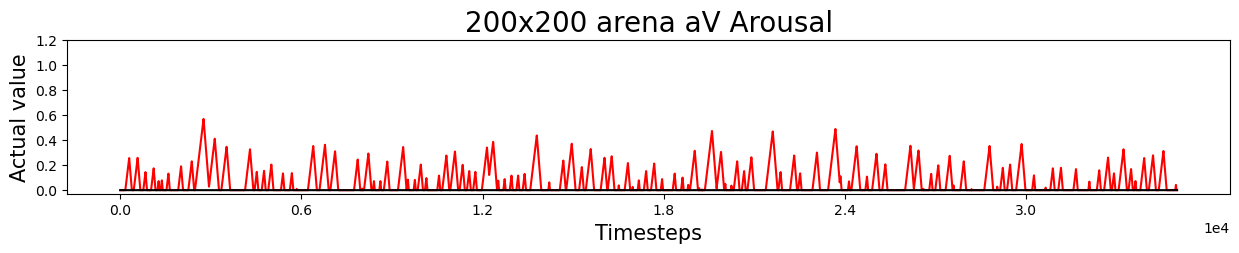

In [30]:
arousal_steps = round(len(aV_arousal)/6,-3)
#print(arousal_steps)

plt.figure(figsize=(15, 2))
plt.plot(aV_arousal,'r')
plt.plot(dV_arousal,'black')
plt.xticks(np.arange(0, len(aV_arousal), step=arousal_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.3, step=0.2))
plt.title('200x200 arena aV Arousal', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [31]:
top_bin=[]
mid_bin=[]
bot_bin=[]

for i in range(len(aV_arousal)):
    if aV_arousal[i] <= 1/3:
        bot_bin.append(aV_arousal[i])
    if aV_arousal[i] > 1/3 and aV_arousal[i] < 2/3:
        mid_bin.append(aV_arousal[i])
    if aV_arousal[i] >= 2/3:
        top_bin.append(aV_arousal[i])
    
mean_bot_bin = round(sum(bot_bin)/len(bot_bin),3)
print("Bot_bin mean value = " + str(mean_bot_bin))
mean_mid_bin = round(sum(mid_bin)/len(mid_bin),3)
print("Mid_bin mean value = " + str(mean_mid_bin))
mean_top_bin = round(sum(top_bin)/len(top_bin),3)
print("Top_bin mean value = " + str(mean_top_bin))

Bot_bin mean value = 0.064
Mid_bin mean value = 0.397


ZeroDivisionError: division by zero

In [32]:
bot_bin_array = np.array(bot_bin)
mid_bin_array = np.array(mid_bin)
top_bin_array = np.array(top_bin)

if p_normal < 0.05:
    bot_mid_stat, bot_mid_p = sci.mannwhitneyu(bot_bin_array, mid_bin_array)
    print("Mann whitney U pvalue for bot/mid bins = " + str(bot_mid_p))
    
    top_mid_stat, top_mid_p = sci.mannwhitneyu(top_bin_array, mid_bin_array)
    print("Mann whitney U pvalue for top/mid bins = " + str(top_mid_p))
else:
    bot_mid_stat, bot_mid_p = sci.ttest_ind(bot_bin_array, mid_bin_array)
    print("T-test pvalue for bot/mid bins = " + str(bot_mid_p))
    
    top_mid_stat, top_mid_p = sci.ttest_ind(top_bin_array, mid_bin_array)
    print("T-test pvalue for top/mid bins = " + str(top_mid_p))
    
print("")
print(sci.levene(bot_bin_array, mid_bin_array))
print(sci.levene(top_bin_array, mid_bin_array))

Mann whitney U pvalue for bot/mid bins = 0.0
Mann whitney U pvalue for top/mid bins = 0.0

LeveneResult(statistic=54.94684098838971, pvalue=1.26629601473491e-13)
LeveneResult(statistic=nan, pvalue=nan)


/home/roboticslab/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


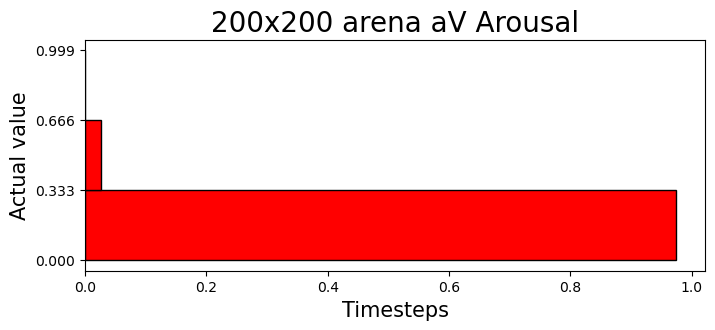

In [33]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(aV_arousal)/float(len(aV_arousal))
plt.hist(aV_arousal, weights=normal, bins=[0,0.3333,0.666,0.999], color = "red",edgecolor='black', orientation='horizontal')

index1 = 1/6
index2 = 29/60
index3 = 31/60
index4 = 5/6
h = len(bot_bin)/len(aV_arousal) # maximum of the involved bar heights

'''if bot_mid_p < 0.05:
    if bot_mid_p < 0.001: sig_label='**'
    else: sig_label='*'
    by_bot = [index1, index1, index2, index2]
    bx_bot = [h, h + 0.02, h + 0.02, h]
    plt.plot(bx_bot, by_bot, 'k-', lw=2)
    plt.text(h+0.06, 1/3, sig_label, ha='center', wrap=True, fontsize=20, rotation=90)

if top_mid_p < 0.05:
    if top_mid_p < 0.001: sig_label='**'
    else: sig_label='*'
    by_top = [index3, index3, index4, index4]
    bx_top = [h, h + 0.02, h + 0.02, h]
    plt.plot(bx_bot, by_top, 'k-', lw=2)
    plt.text(h+0.06, 2/3, sig_label, ha='center', wrap=True, fontsize=20, rotation=90)
  '''      
plt.yticks(np.arange(0, 1, step=0.333))
plt.title('200x200 arena aV Arousal', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

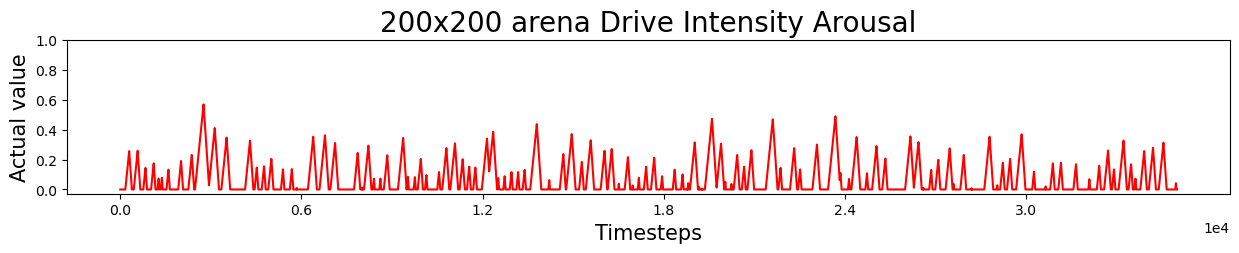

In [34]:
arousal_steps = round(len(aroIntensity)/6,-3)
#print(arousal_steps)

plt.figure(figsize=(15, 2))
plt.plot(aroIntensity,'r')
plt.xticks(np.arange(0, len(aroIntensity), step=arousal_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena Drive Intensity Arousal', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

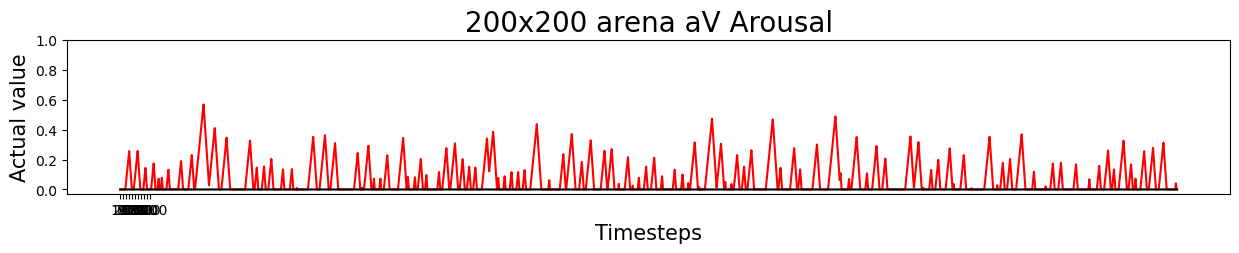

In [35]:
plt.figure(figsize=(15, 2))
plt.plot(aV_arousal,'r')
plt.plot(dV_arousal,'black')
plt.xticks(np.arange(0, 1001, step=100))
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena aV Arousal', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

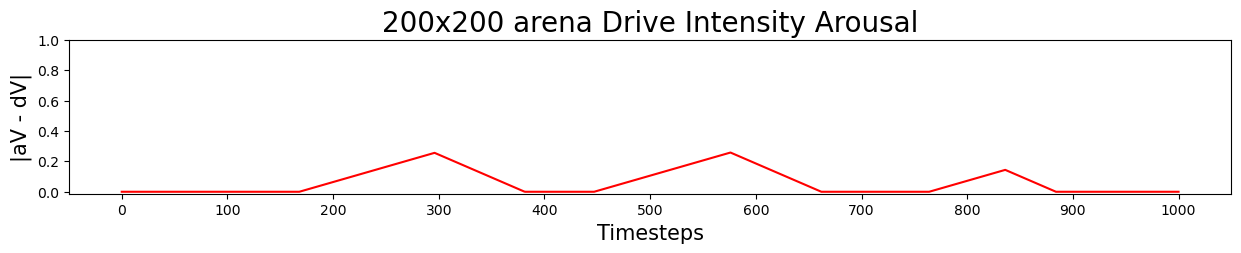

In [36]:
plt.figure(figsize=(15, 2))
plt.plot(aroIntensity[:1001],'r')
plt.xticks(np.arange(0, len(aroIntensity[:1001]), step=100))
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena Drive Intensity Arousal', fontsize=20)
plt.ylabel('|aV - dV|', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

## Security analyses

In [37]:
mean_security = round(sum(aV_security)/len(aV_security),3)
print("Security mean value = " + str(mean_security))
print("")

aV_security_array = np.array(aV_security)
stat_normal, p_normal = sci.normaltest(aV_security_array)
print("Normality test p value = " + str(p_normal))

Security mean value = 0.939

Normality test p value = 0.0


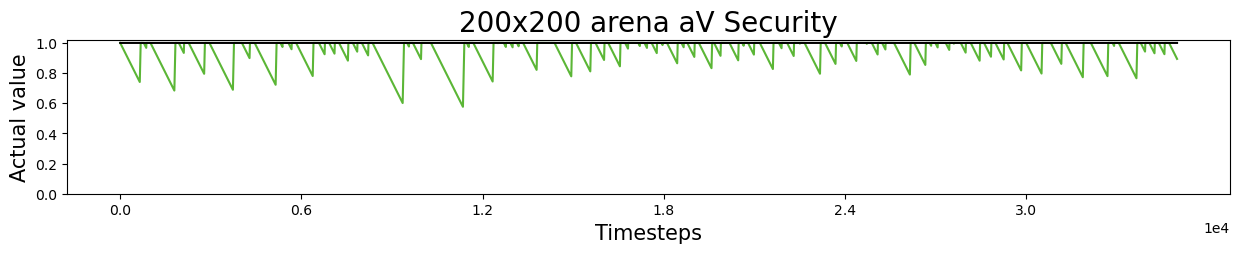

In [38]:
security_steps = round(len(aV_security)/6,-3)
#print(security_steps)

plt.figure(figsize=(15, 2))
plt.plot(aV_security, "#5BB636")
plt.plot(dV_security,'black')
plt.xticks(np.arange(0, len(aV_security), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena aV Security', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [39]:
top_bin=[]
mid_bin=[]
bot_bin=[]

top_bin_div=len(top_bin)
mid_bin_div=len(mid_bin)
bot_bin_div=len(bot_bin)

if top_bin_div == 0: top_bin_div=0.00001
if mid_bin_div == 0: mid_bin_div=0.00001
if bot_bin_div == 0: bot_bin_div=0.00001

for i in range(len(aV_security)):
    if aV_security[i] <= 1/3:
        bot_bin.append(aV_security[i])
    if aV_security[i] > 1/3 and aV_security[i] < 2/3:
        mid_bin.append(aV_security[i])
    if aV_security[i] >= 2/3:
        top_bin.append(aV_security[i])
    
np.seterr(divide='ignore', invalid='ignore')
mean_bot_bin = round(sum(bot_bin)/bot_bin_div,3)
print("Bot_bin mean value = " + str(mean_bot_bin))
mean_mid_bin = round(sum(mid_bin)/mid_bin_div,3)
print("Mid_bin mean value = " + str(mean_mid_bin))
mean_top_bin = round(sum(top_bin)/top_bin_div,3)
print("Top_bin mean value = " + str(mean_top_bin))

Bot_bin mean value = 0.0
Mid_bin mean value = 25380800.0
Top_bin mean value = 3259614600.0


In [40]:
mean_bot_bin

0.0

In [41]:
bot_bin_array = np.array(bot_bin)
mid_bin_array = np.array(mid_bin)
top_bin_array = np.array(top_bin)

if p_normal < 0.05:
    bot_mid_stat, bot_mid_p = sci.mannwhitneyu(bot_bin_array, mid_bin_array)
    print("Mann whitney U pvalue for bot/mid bins = " + str(bot_mid_p))
    
    top_mid_stat, top_mid_p = sci.mannwhitneyu(top_bin_array, mid_bin_array)
    print("Mann whitney U pvalue for top/mid bins = " + str(top_mid_p))
else:
    bot_mid_stat, bot_mid_p = sci.ttest_ind(bot_bin_array, mid_bin_array)
    print("T-test pvalue for bot/mid bins = " + str(bot_mid_p))
    
    top_mid_stat, top_mid_p = sci.ttest_ind(top_bin_array, mid_bin_array)
    print("T-test pvalue for top/mid bins = " + str(top_mid_p))
    
print("")
print(sci.levene(bot_bin_array, mid_bin_array))
print(sci.levene(top_bin_array, mid_bin_array))

Mann whitney U pvalue for bot/mid bins = 0.0
Mann whitney U pvalue for top/mid bins = 3.4678948851757285e-276

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=135.48953350878844, pvalue=2.946455780928238e-31)


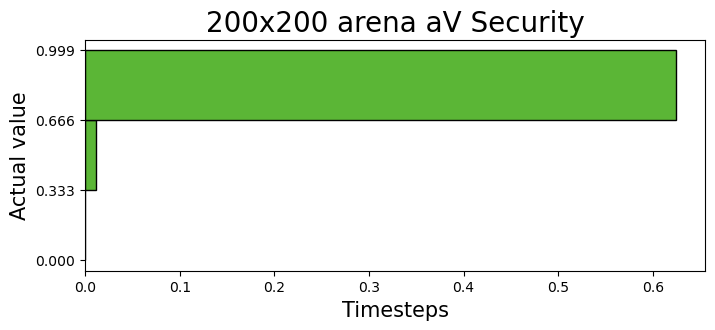

In [42]:
plt.figure(figsize=(8, 3))

normal = np.ones_like(aV_security)/float(len(aV_security))
plt.hist(aV_security, weights=normal, bins=[0,0.3333,0.666,0.999], color = "#5BB636",edgecolor='black', orientation='horizontal')

index1 = 1/6
index2 = 29/60
index3 = 31/60
index4 = 5/6
h = len(mid_bin)/len(aV_security) # maximum of the involved bar heights
#h += 0.02

'''if bot_mid_p < 0.05:
    if bot_mid_p < 0.001: sig_label='**'
    else: sig_label='*'
    by_bot = [index1, index1, index2, index2]
    bx_bot = [h, h + 0.02, h + 0.02, h]
    plt.plot(bx_bot, by_bot, 'k-', lw=2)
    plt.text(h+0.04, 1/3, sig_label, ha='center', wrap=True, fontsize=20, rotation=90)

if top_mid_p < 0.05:
    if top_mid_p < 0.001: sig_label='**'
    else: sig_label='*'
    by_top = [index3, index3, index4, index4]
    bx_top = [h, h + 0.02, h + 0.02, h]
    plt.plot(bx_bot, by_top, 'k-', lw=2)
    plt.text(h+0.04, 2/3, sig_label, ha='center', wrap=True, fontsize=20, rotation=90)
       ''' 


plt.yticks(np.arange(0, 1, step=0.333))
plt.title('200x200 arena aV Security', fontsize=20)
plt.xlabel('Timesteps', fontsize=15)
plt.ylabel('Actual value', fontsize=15)
plt.show()

In [43]:
normal

array([2.85714286e-05, 2.85714286e-05, 2.85714286e-05, ...,
       2.85714286e-05, 2.85714286e-05, 2.85714286e-05])

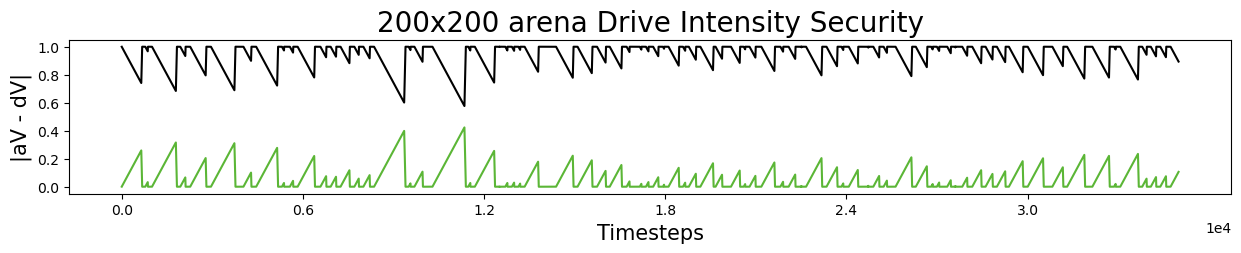

In [44]:
security_steps = round(len(secIntensity)/6,-3)
#print(arousal_steps)

plt.figure(figsize=(15, 2))
plt.plot(aV_security, "black")
plt.plot(secIntensity,"#5BB636")
plt.xticks(np.arange(0, len(secIntensity), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena Drive Intensity Security', fontsize=20)
plt.ylabel('|aV - dV|', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

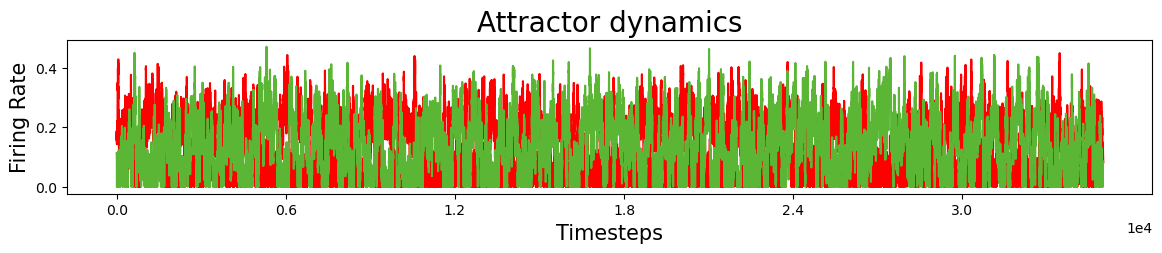

In [45]:
max_fr=0

if max(force_arousal)>max(force_security):
    max_fr=round(max(force_arousal),3)
else:
    max_fr=round(max(force_security),3)



security_steps = round(len(force_arousal)/6,-3)
#print(security_steps)

plt.figure(figsize=(14, 2))
plt.plot(force_arousal, "r")
plt.plot(force_security,'#5BB636')
plt.xticks(np.arange(0, len(force_arousal), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, max_fr+0.1, step=0.2))
plt.title('Attractor dynamics', fontsize=20)
plt.ylabel('Firing Rate', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [46]:
max_fr

0.472

In [47]:
switch_n = 0
past_arousal = False
dominance_period = 100

for i in range(len(force_arousal)-dominance_period):
    mean_10_arousal = 0
    mean_10_security = 0
    ten_arousal = 0
    ten_security = 0
    for j in range (dominance_period):
        ten_arousal += force_arousal[i+j]
        ten_security += force_security[i+j]
    mean_10_arousal = ten_arousal/10
    mean_10_security = ten_security/10
    
    if mean_10_arousal>mean_10_security and past_arousal == False:
        switch_n+=1
        past_arousal = True
    if mean_10_arousal>mean_10_security and past_arousal == True:
        pass
    if mean_10_arousal<mean_10_security and past_arousal == True:
        switch_n+=1
        past_arousal = False
    if mean_10_arousal<mean_10_security and past_arousal == False:
        pass
    
print('Number of switches in attractor = ' + str(switch_n))
print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in attractor = 161
Considering periods of 100 episodes


In [48]:
abs_force_arousal = []
for i in range(len(force_arousal)):
    abs_force_arousal.append(abs(force_arousal[i]))
    

18112
16875
34987


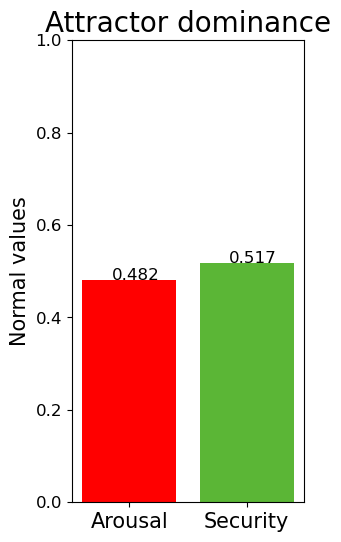

In [49]:
security_count = 0
arousal_count = 0

for i in range(len(force_arousal)):
    if force_arousal[i]>force_security[i]:
        arousal_count+=1
    if force_arousal[i]<force_security[i]:
        security_count+=1
        
print(security_count)
print(arousal_count)
print(arousal_count+security_count)


norm_aro = arousal_count/len(force_arousal)
norm_sec = security_count/len(force_security)


objects = ('Arousal', 'Security')
y_pos = np.arange(len(objects))
values = [round(norm_aro, 3), round(norm_sec, 3)]

plt.figure(figsize=(3, 6))
plt.bar(y_pos, values, align='center', color=['red', '#5BB636'])
plt.xticks(y_pos, objects, fontsize=15)
plt.ylabel('Normal values', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=12)
plt.title('Attractor dominance', fontsize=20)

for index, value in enumerate(values):
    plt.text(index-0.15, value, str(value), fontsize=12)


plt.show()

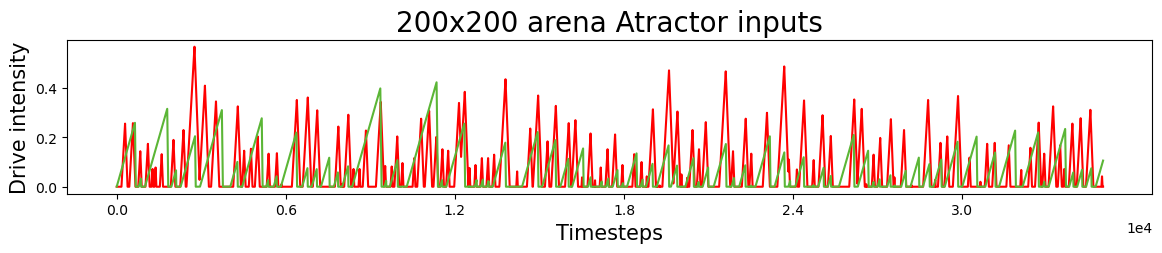

In [50]:
security_steps = round(len(aroIntensity)/6,-3)
#print(security_steps)

plt.figure(figsize=(14, 2))
plt.plot(aroIntensity, "r")
plt.plot(secIntensity,'#5BB636')
plt.xticks(np.arange(0, len(secIntensity), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('200x200 arena Atractor inputs', fontsize=20)
plt.ylabel('Drive intensity', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

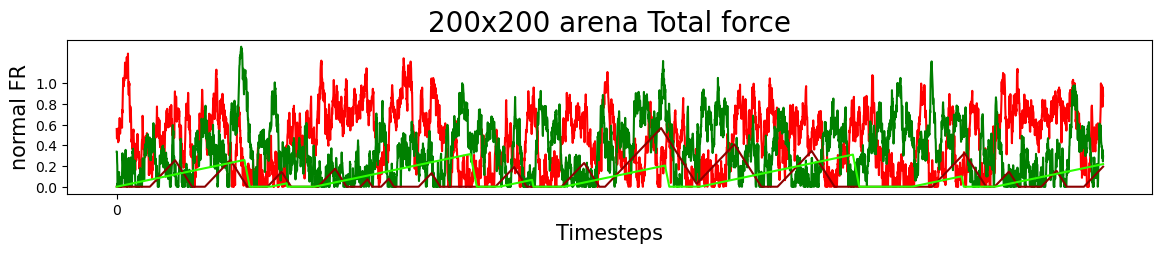

In [51]:
max_fr=0

if max(force_arousal)>max(force_security):
    max_fr=round(max(force_arousal),3)
else:
    max_fr=round(max(force_security),3)


security_steps = round(len(force_arousal)/6,-3)
#print(security_steps)

plt.figure(figsize=(14, 2))
plt.plot(np.array(force_arousal[:5000])*3, "r")
plt.plot(np.array(force_security[:5000])*3,'g')
plt.plot(aroIntensity[:5000], "darkred")
plt.plot(secIntensity[:5000],'#2bff00')
plt.xticks(np.arange(0, len(force_arousal[:5000]), step=security_steps))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(np.arange(0, 1.05, step=0.2))
plt.title('200x200 arena Total force', fontsize=20)
plt.ylabel('normal FR', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

In [52]:
switch_n = 0
past_arousal = False
dominance_period = 100

for i in range(len(secIntensity)-dominance_period):
    mean_arousal = 0
    mean_security = 0
    period_arousal = 0
    period_security = 0
    
    for j in range (dominance_period):
        period_arousal += aroIntensity[i+j]
        period_security += secIntensity[i+j]
    mean_arousal = period_arousal/10
    mean_security = period_security/10
    
    if mean_arousal>mean_security and past_arousal == False:
        switch_n+=1
        past_arousal = True
    if mean_arousal>mean_security and past_arousal == True:
        pass
    if mean_arousal<mean_security and past_arousal == True:
        switch_n+=1
        past_arousal = False
    if mean_arousal<mean_security and past_arousal == False:
        pass
    
print('Number of switches in behaviour = ' + str(switch_n))
print('Considering periods of ' + str(dominance_period) + ' episodes')

Number of switches in behaviour = 110
Considering periods of 100 episodes
